# Final Project - To Predict the House Price

In [1]:
# Load the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy.stats import stats, norm
import os
%matplotlib inline
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('train.csv')

## Data Cleaning

In [3]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [3]:
#Checking missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total of Missing', 'Percent'])
missing_data.head(20)

,Total of Missing,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [4]:
#Dealing with missing data, we delect the column with too many missing (the percentage > 0.15)
df_cln = df.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)
df_cln2 = df_cln.dropna(axis=0, how='any')


In [7]:
df_cln2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1459
Data columns (total 75 columns):
Id               1338 non-null int64
MSSubClass       1338 non-null int64
MSZoning         1338 non-null object
LotArea          1338 non-null int64
Street           1338 non-null object
LotShape         1338 non-null object
LandContour      1338 non-null object
Utilities        1338 non-null object
LotConfig        1338 non-null object
LandSlope        1338 non-null object
Neighborhood     1338 non-null object
Condition1       1338 non-null object
Condition2       1338 non-null object
BldgType         1338 non-null object
HouseStyle       1338 non-null object
OverallQual      1338 non-null int64
OverallCond      1338 non-null int64
YearBuilt        1338 non-null int64
YearRemodAdd     1338 non-null int64
RoofStyle        1338 non-null object
RoofMatl         1338 non-null object
Exterior1st      1338 non-null object
Exterior2nd      1338 non-null object
MasVnrType       1338 non-

In [5]:
#Change year to house age
col_drop = ["YearBuilt", "YrSold", "YearRemodAdd", "GarageYrBlt"]
#Adding "house age", "years_remodel" (years since last remodel), "age of garage" 
df_cln2["Age"] = df_cln2["YrSold"] - df_cln2["YearBuilt"]
df_cln2["YrRemod"] = df_cln2["YrSold"] - df_cln2["YearRemodAdd"]
df_cln2["GarageAge"] = df_cln2["YrSold"] - df_cln2["GarageYrBlt"]
df_cln3 = df_cln2.drop(df_cln2[col_drop],axis=1)


//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-

In [6]:
#Change MSSubClass to categorical
df_cln3['MSSubClass'] = df_cln3['MSSubClass'].astype('object')

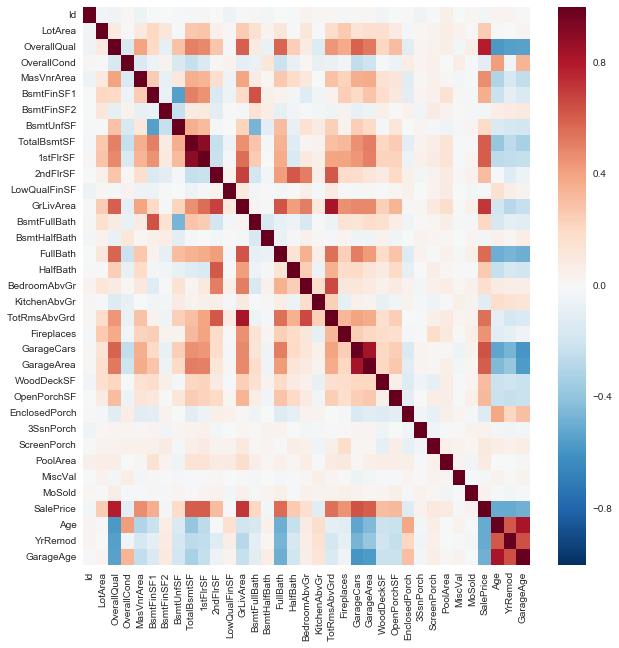

In [57]:
#Correlation heatmap
fig, ax = plt.subplots(figsize=(10,10))
corr = df_cln3.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)


In [7]:
#Delete the features, which are highly correlated
col_drop2 = ["1stFlrSF","GarageCars","GarageAge"]
dta = df_cln3.drop(df_cln3[col_drop2],axis=1)

## Exploration Data Analysis 

In [12]:
#Continuous features
dta.describe()

,Id,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,Age,YrRemod
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,731.228700,10706.294469,6.219731,5.596413,110.360239,464.234679,49.218236,582.494768,1095.947683,357.141256,4.221973,1537.585202,0.438714,0.060538,1.575486,0.402840,2.864723,1.029895,6.550075,0.648729,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,186761.782511,34.776532,22.136771
std,421.779691,10336.621126,1.324472,1.078124,185.604816,458.792420,166.196584,439.950528,405.554435,440.324982,40.712916,520.579960,0.515630,0.241685,0.547570,0.504185,0.776677,0.174697,1.585071,0.645393,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,78913.847668,29.603970,20.294171
min,1.000000,1300.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,105.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,35311.000000,0.000000,-1.000000
25%,366.250000,7744.000000,5.000000,5.000000,0.000000,0.000000,0.000000,248.000000,819.750000,0.000000,0.000000,1160.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,377.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,135000.000000,7.000000,4.000000
50%,730.500000,9600.000000,6.000000,5.000000,0.000000,413.000000,0.000000,489.000000,1021.500000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,484.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,168500.000000,33.000000,14.000000
75%,1098.750000,11760.750000,7.000000,6.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,740.500000,0.000000,1791.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,583.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,220000.000000,52.000000,39.750000
max,1460.000000,215245.000000,10.000000,9.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,755000.000000,129.000000,60.000000


In [8]:
#Delete one row in "YrRemod" with the negative value.
dta = dta.drop((dta.loc[dta["YrRemod"] < 0]).index)

In [14]:
#Categorical features
dta.describe(include=["O"])

,MSSubClass,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337,1337
unique,15,5,2,4,4,2,5,3,25,9,8,5,8,6,8,14,16,4,4,4,5,4,4,4,6,6,4,5,2,5,4,7,6,3,5,5,3,9,6
top,20,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,502,1065,1332,829,1206,1336,956,1264,209,1162,1324,1137,657,1037,1313,486,475,763,803,1182,619,594,1236,887,401,1175,1317,703,1276,1241,650,1253,852,580,1269,1286,1256,1158,1104


In [10]:
#Some of categorical features are highly skewed("RoofMatl","Condition2"...)
obj_df = dta.select_dtypes(include=['object']).copy()
int_df = dta.select_dtypes(exclude=['object']).copy()

obj_dict = {}
for i in obj_df.columns:
    obj_dict = obj_df[i].value_counts()
    print(i)
    print(obj_dict)

MSSubClass
20     502
60     293
50     129
120     86
160     61
80      57
70      57
30      51
90      28
190     21
85      19
75      14
45       9
180      6
40       4
Name: MSSubClass, dtype: int64
MSZoning
RL         1065
RM          191
FV           62
RH           11
C (all)       8
Name: MSZoning, dtype: int64
Street
Pave    1332
Grvl       5
Name: Street, dtype: int64
LotShape
Reg    829
IR1    458
IR2     40
IR3     10
Name: LotShape, dtype: int64
LandContour
Lvl    1206
Bnk      51
HLS      48
Low      32
Name: LandContour, dtype: int64
Utilities
AllPub    1336
NoSeWa       1
Name: Utilities, dtype: int64
LotConfig
Inside     956
Corner     244
CulDSac     90
FR2         43
FR3          4
Name: LotConfig, dtype: int64
LandSlope
Gtl    1264
Mod      61
Sev      12
Name: LandSlope, dtype: int64
Neighborhood
NAmes      209
CollgCr    146
OldTown    100
Somerst     83
Gilbert     77
NridgHt     75
NWAmes      73
Sawyer      69
Edwards     69
SawyerW     53
Crawfor     50
Br

## Feature Selection 

### Mutual Information


In [61]:
from sklearn.feature_selection import mutual_info_regression

In [11]:
#Create the dummies
dum_df = pd.get_dummies(obj_df)

In [12]:
dta_dum = pd.concat([dum_df,int_df], axis=1)

In [64]:
#Apply the mutual information regressor to X and Y
X_mi = dta_dum.drop(['SalePrice'], axis=1)
y_mi = dta_dum['SalePrice']

In [20]:
#Obtain the mutual information score and devided by the max value in the list
mi = mutual_info_regression(X_mi, y_mi)
mi /= np.max(mi)

/Users/askar/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


In [21]:
mi_dir = dict(zip(X_mi.columns, mi))

In [22]:
#Sort the score from high to low.
for key, value in sorted(mi_dir.items(), key=lambda item: (item[1], item[0]), reverse=True):
    print ("%s: %s" % (key, value))


OverallQual: 1.0
GrLivArea: 0.913597962052
TotalBsmtSF: 0.667028648063
Age: 0.663376655453
GarageArea: 0.653190391097
FullBath: 0.518674233474
YrRemod: 0.49494384855
ExterQual_TA: 0.469268951872
TotRmsAbvGrd: 0.428406870162
KitchenQual_TA: 0.4225750319
2ndFlrSF: 0.383453986185
ExterQual_Gd: 0.380758064278
GarageFinish_Unf: 0.36536420568
BsmtQual_TA: 0.364593920368
Foundation_PConc: 0.336457096339
KitchenQual_Gd: 0.324279863555
LotArea: 0.305241963457
Fireplaces: 0.281878080381
BsmtQual_Gd: 0.276189434275
OpenPorchSF: 0.274187207934
GarageType_Detchd: 0.260224744626
BsmtFinSF1: 0.24471824023
Foundation_CBlock: 0.231839933948
BsmtUnfSF: 0.218718580001
GarageFinish_Fin: 0.215041275722
HeatingQC_Ex: 0.21227766514
BsmtQual_Ex: 0.209027988926
BsmtFinType1_GLQ: 0.195601951365
MSSubClass_60: 0.194394878793
WoodDeckSF: 0.192227352567
KitchenQual_Ex: 0.191498404082
OverallCond: 0.185451639883
HeatingQC_TA: 0.181059949632
Neighborhood_NAmes: 0.169396219685
MSZoning_RM: 0.167747571032
Exterior2nd_

Here is the criteria for feature selection: 
1, The features show a larger gap than the next one in the rank. For example, there is a gap between "GarageArea" (Mutual score = 0.622818293669) and "FullBath" (Mutual score = 0.483804508622);
2, To obtain a reasonable size of features. The sufficient number of feature to build a good model, and also able to avoid over-fit.
In this case, we select 14 features: OverallQual, GrLivArea, TotalBsmtSF, GarageArea, Age, FullBath, YrRemod, ExterQual_TA, TotRmsAbvGrd, ExterQual_Gd, 2ndFlrSF, KitchenQual_TA BsmtQual_TA, GarageFinish_Unf

In [65]:
selected = ["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea", "Age", "FullBath", "YrRemod", 
            "ExterQual_TA", "TotRmsAbvGrd", "ExterQual_Gd", "2ndFlrSF", "KitchenQual_TA", "BsmtQual_TA", 
            "GarageFinish_Unf"]
X = X_mi.loc[:,selected]

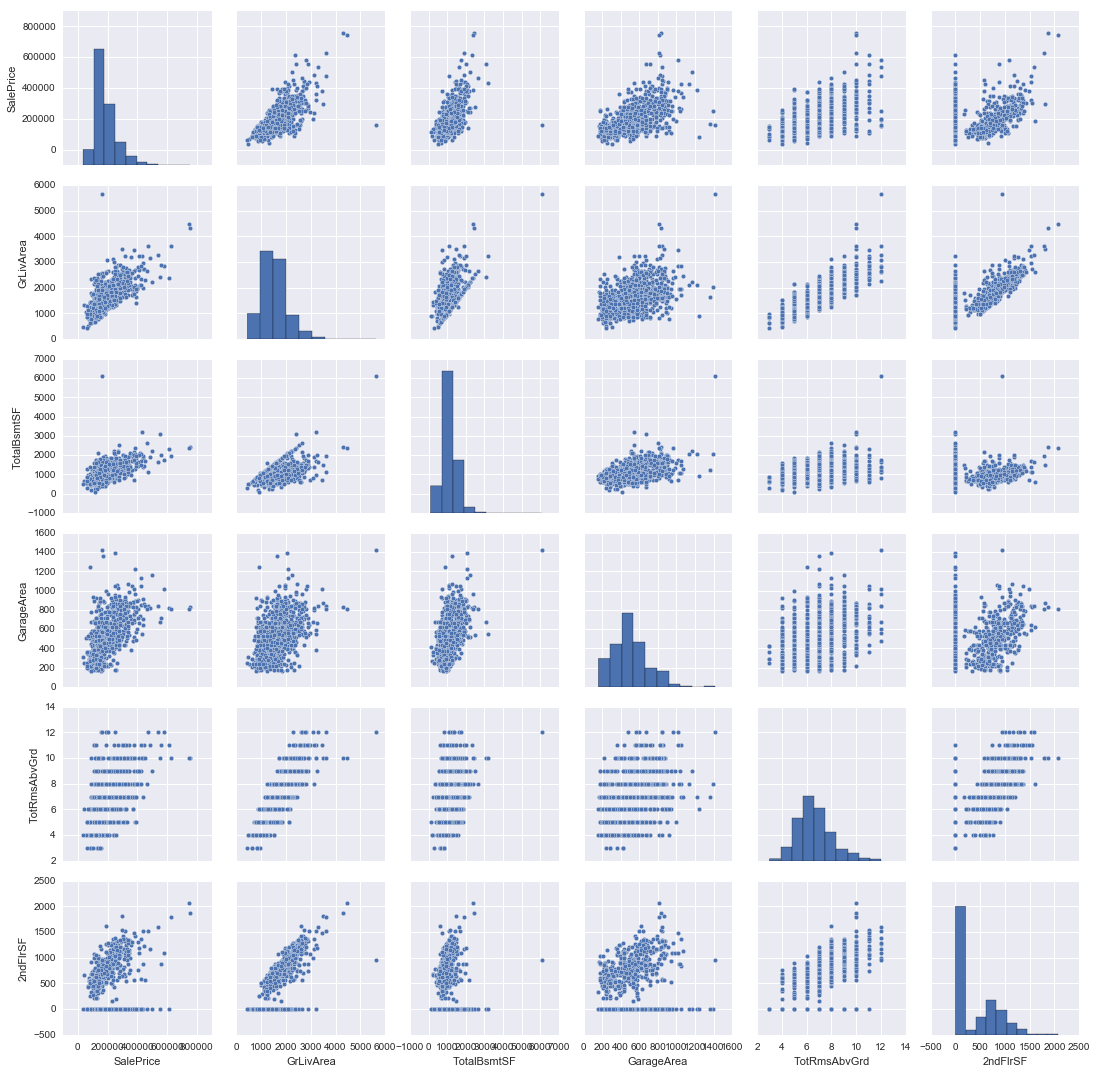

In [66]:
#Checking normality 
cols1 = ["SalePrice", "GrLivArea", "TotalBsmtSF", "GarageArea", "TotRmsAbvGrd", "2ndFlrSF",]
sns.pairplot(dta_dum.loc[:,cols1], size = 2.5)
plt.show()

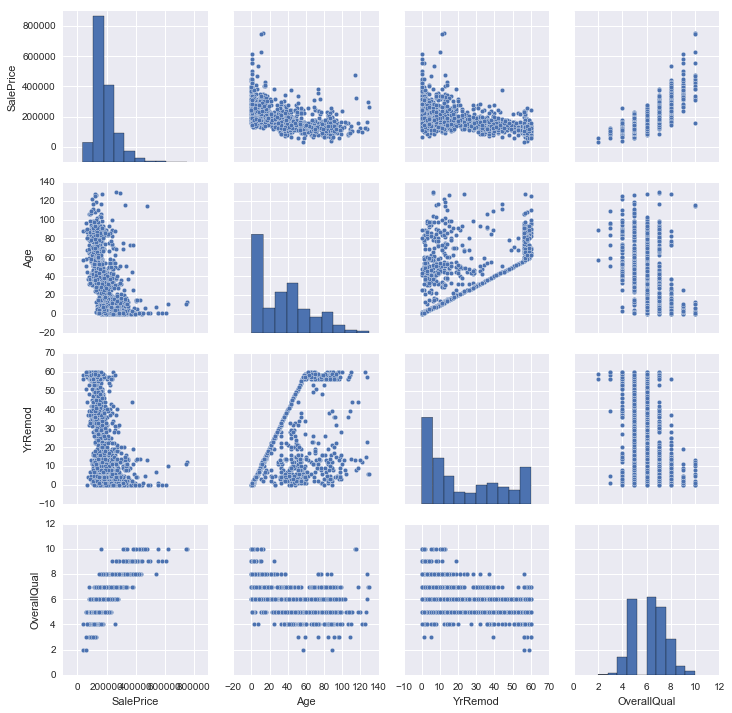

In [67]:
cols2 = ["SalePrice", "Age","YrRemod", "OverallQual"] 
sns.pairplot(dta_dum.loc[:,cols2], size = 2.5)
plt.show()

In [68]:
#Transformed response
#applying log transformation
y = np.log(y_mi)

/Users/askar/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


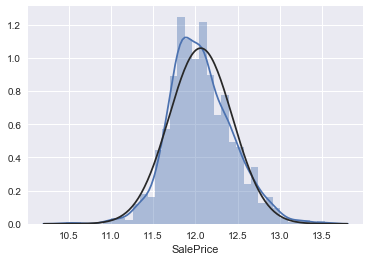

In [27]:
#Checking transformed histogram
sns.distplot(y, fit=norm);
fig = plt.figure()

/Users/askar/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


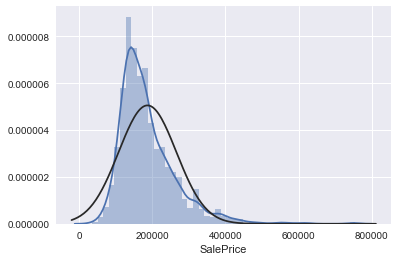

In [28]:
#Checking transformed histogram
sns.distplot(y_mi, fit=norm);
fig = plt.figure()

In [69]:
from sklearn import preprocessing

In [70]:
## Standardizing numeric features
cols_scaled = ["OverallQual","GrLivArea", "TotalBsmtSF", "GarageArea", "Age", "YrRemod", 
               "TotRmsAbvGrd", "2ndFlrSF", "FullBath"]
X_scaled = X.loc[:,cols_scaled]
X_standardized = (X_scaled - X_scaled.mean())/X_scaled.std()

In [71]:
X.update(X_standardized)

In [72]:
#Normalizing the features
X = pd.DataFrame(preprocessing.normalize(X, norm='l2'),columns = selected)

### LASSO & Elastic Net Regularization


In [75]:
from sklearn import linear_model, cross_validation
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [76]:
def LASTest(X_trn, X_ts, y_trn, y_ts):
    #Fit the LASSO regression
    model_fit = linear_model.LassoCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10],
                           max_iter=5000,
                           cv = 5).fit(X_trn, y_trn)
    #List all the coefficients
    print(list(zip(X_trn.columns, model_fit.coef_)))
    #The R^2
    train_pred_lasso = model_fit.predict(X_trn)
    test_pred_lasso = model_fit.predict(X_ts)
    r2_score_lasso = r2_score(y_ts, test_pred_lasso)
    print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_trn - train_pred_lasso) ** 2))
    print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_ts - test_pred_lasso) ** 2))    
    print("r^2 on data : %f" % r2_score_lasso)

def ENSTest(X_trn, X_ts, y_trn, y_ts):
    model_fit = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], 
                                    l1_ratio=[.01, .1, .5, .9, .99], 
                                    max_iter=5000,
                                   cv = 5).fit(X_trn, y_trn)
    #List all the coefficients
    print(list(zip(X_trn.columns, model_fit.coef_)))
    #The R^2
    train_pred_ENS = model_fit.predict(X_trn)
    test_pred_ENS = model_fit.predict(X_ts)
    r2_score_ENS = r2_score(y_ts, test_pred_ENS)
    print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_trn - train_pred_ENS) ** 2))
    print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_ts - test_pred_ENS) ** 2))    
    print("r^2 on data : %f" % r2_score_ENS)


In [114]:
dta_dum.to_csv('/Users/askar/exported.csv')

In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [43]:
LASTest(x_train, x_test, y_train, y_test)

[('OverallQual', 0.35568903030459242), ('GrLivArea', 0.55207571393699129), ('TotalBsmtSF', 0.31820392375313755), ('GarageArea', 0.16193341434780378), ('Age', -0.21171160113556312), ('FullBath', -0.11155015626935808), ('YrRemod', -0.18528253174615625), ('ExterQual_TA', -0.13044136811204657), ('TotRmsAbvGrd', 0.019370358924623618), ('ExterQual_Gd', -0.40446275892963751), ('2ndFlrSF', 0.047963208776826159), ('KitchenQual_TA', -0.066312632498743043), ('BsmtQual_TA', 0.0085704171943807219), ('GarageFinish_Unf', -0.20193397248880834)]
Fit a model X_train, and calculate MSE with Y_train: 0.031020347936680553
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.02851401570614021
r^2 on data : 0.787756


The coefficient of 'ExterQual_TA', 'BsmtQual_TA' are 0, which means should be delected.

In [44]:
ENSTest(x_train, x_test, y_train, y_test)

[('OverallQual', 0.35819143082503457), ('GrLivArea', 0.54457861940873631), ('TotalBsmtSF', 0.31726892991072442), ('GarageArea', 0.16694894189646683), ('Age', -0.19752945797153618), ('FullBath', -0.10716866370964792), ('YrRemod', -0.18324419341995474), ('ExterQual_TA', -0.085052983025907913), ('TotRmsAbvGrd', 0.024410251377010535), ('ExterQual_Gd', -0.34531701980067742), ('2ndFlrSF', 0.046253976772515637), ('KitchenQual_TA', -0.060546989795014647), ('BsmtQual_TA', 0.0), ('GarageFinish_Unf', -0.19334005130121015)]
Fit a model X_train, and calculate MSE with Y_train: 0.031077893495633137
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.02835500254016539
r^2 on data : 0.788940


From the result of the regularization, we delete "BsmtQual_TA".

In [26]:
selected2 =["OverallQual", "GrLivArea", "TotalBsmtSF", "GarageArea", "Age", "FullBath", "YrRemod", 
            "ExterQual_TA", "TotRmsAbvGrd", "ExterQual_Gd", "2ndFlrSF", "KitchenQual_TA", "GarageFinish_Unf"]
X = X.loc[:,selected2]

### Linear Regression

In [46]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [47]:
regr = linear_model.LinearRegression()

In [48]:
# Train the model using the training sets
regr_model = regr.fit(x_train, y_train)

In [49]:
list(zip(regr_model.coef_, selected2))

[(0.35315309555985885, 'OverallQual'),
 (0.54881999154978445, 'GrLivArea'),
 (0.32178656743548251, 'TotalBsmtSF'),
 (0.15986014420624756, 'GarageArea'),
 (-0.21528290704694683, 'Age'),
 (-0.11493011339767883, 'FullBath'),
 (-0.18587630823856735, 'YrRemod'),
 (-0.14978842302440737, 'ExterQual_TA'),
 (0.01997889530795123, 'TotRmsAbvGrd'),
 (-0.43059362337574858, 'ExterQual_Gd'),
 (0.051971384283237165, '2ndFlrSF'),
 (-0.069352603260781243, 'KitchenQual_TA'),
 (-0.20707998675575914, 'GarageFinish_Unf')]

In [50]:
# mean squared error for training and test data
#train_pred = regr_model.predict(x_train)
test_pred = regr_model.predict(x_test)

#r2_train_reg = r2_score(y_train, train_pred)
r2_test_reg = r2_score(y_test, test_pred)
#print("r^2 on training : %f" % r2_train_reg)
print("r^2 on test : %f" % r2_test_reg)

#print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train - train_pred) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test - test_pred) ** 2))

r^2 on test : 0.786837
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.028637510770394392


In [51]:
scores = cross_validation.cross_val_score(regr, X, y, scoring='neg_mean_squared_error', cv=5)
print("The cv score is", scores)
print("The average of cv score is", scores.mean())

The cv score is [-0.02947165 -0.02693236 -0.03315312 -0.03506251 -0.03068694]
The average of cv score is -0.0310613154373


##### Model diagnose

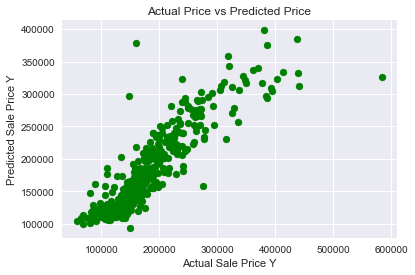

In [52]:
#plt.scatter(y_train, train_pred, c = "b", alpha = 0.5)
plt.scatter(np.exp(y_test), np.exp(test_pred), c = "g")
plt.xlabel("Actual Sale Price Y")
plt.ylabel("Predicted Sale Price Y")
plt.title("Actual Price vs Predicted Price")

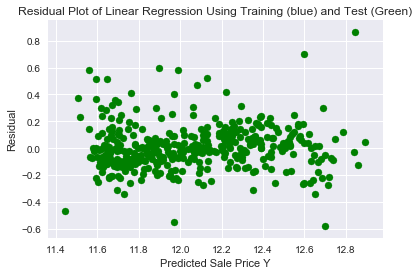

In [53]:
#plt.scatter(train_pred, train_pred - y_train, c = "b", alpha = 0.5)
plt.scatter(test_pred, test_pred - y_test, c = "g")
plt.title("Residual Plot of Linear Regression Using Training (blue) and Test (Green)")
plt.ylabel("Residual")
plt.xlabel("Predicted Sale Price Y")

### Stochastic Gradient Descent

In [56]:
from sklearn.linear_model import SGDRegressor

In [57]:
X_sgd = X_mi.loc[:,selected2]

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_sgd)
X_sgd = pd.DataFrame(preprocessing.normalize(scaler.transform(X_sgd), norm='l2'),columns = selected2)

In [59]:
x_train, x_test, y_train, y_test = train_test_split(X_sgd, y, test_size=0.3, random_state=123)

In [60]:
sgd_reg = SGDRegressor()

In [61]:
sgd_reg_model = sgd_reg.fit(x_train, y_train)

In [62]:
list(zip(sgd_reg_model.coef_, selected2))

[(0.23375406198341647, 'OverallQual'),
 (0.083297231381986969, 'GrLivArea'),
 (0.11986359354872328, 'TotalBsmtSF'),
 (0.11469319669004824, 'GarageArea'),
 (-0.24267550656056858, 'Age'),
 (0.12098291429780469, 'FullBath'),
 (-0.13837992930784096, 'YrRemod'),
 (0.021420732063328448, 'ExterQual_TA'),
 (0.031889618367653187, 'TotRmsAbvGrd'),
 (0.021739160411725883, 'ExterQual_Gd'),
 (0.0082071260724253334, '2ndFlrSF'),
 (-0.11989762370963364, 'KitchenQual_TA'),
 (-0.21050813736760532, 'GarageFinish_Unf')]

In [63]:
# mean squared error for training and test data
#train_sgd_pred = sgd_reg_model.predict(x_train)
test_sgd_pred = sgd_reg_model.predict(x_test)

#r2_train_reg = r2_score(y_train, train_sgd_pred)
r2_test_reg = r2_score(y_test, test_sgd_pred)
#print("r^2 on training : %f" % r2_train_reg)
print("r^2 on test : %f" % r2_test_reg)

#print ("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train - train_sgd_pred) ** 2))
print ("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test - test_sgd_pred) ** 2))

r^2 on test : 0.660264
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.04564211999381648


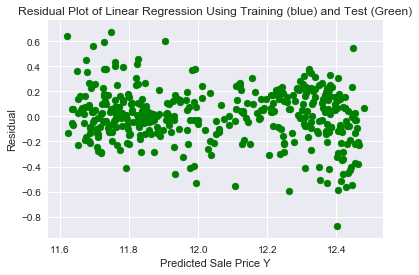

In [66]:
#plt.scatter(train_sgd_pred, train_sgd_pred - y_train, c = "b", alpha = 0.5)
plt.scatter(test_sgd_pred, test_sgd_pred - y_test, c = "g")
plt.title("Residual Plot of Linear Regression Using Training (blue) and Test (Green)")
plt.ylabel("Residual")
plt.xlabel("Predicted Sale Price Y")

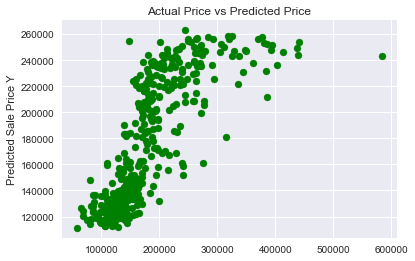

In [67]:
#plt.scatter(y_train, train_sgd_pred, c = "b", alpha = 0.5)
plt.scatter(np.exp(y_test), np.exp(test_sgd_pred), c = "g")
#plt.xlabel("Actual Sale Price Y")
plt.ylabel("Predicted Sale Price Y")
plt.title("Actual Price vs Predicted Price")

## Outlier Detection

We apply the K-means to check the outliers. 

In [1]:
from sklearn.cluster import KMeans

In [36]:
k_means = KMeans(n_clusters = 3)
k_means.fit(dta_dum) 

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [37]:
labels = k_means.labels_

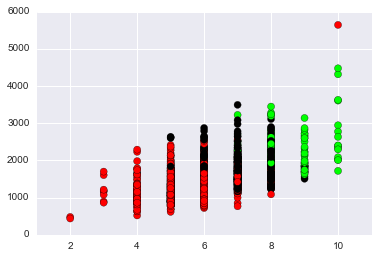

In [44]:
colormap = np.array(['red', 'lime', 'black'])
plt.scatter(dta_dum.OverallQual, dta_dum.GrLivArea, c=colormap[labels], s=50)
plt.title('K Mean Clustering')


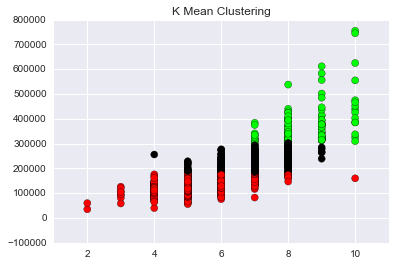

In [43]:
plt.scatter(dta_dum.OverallQual, dta_dum.SalePrice, c=colormap[labels], s=50)
plt.title('K Mean Clustering')


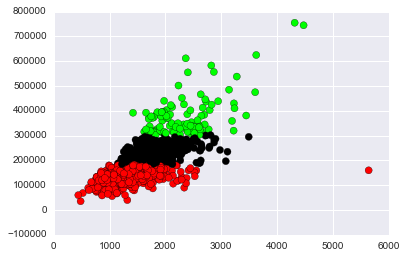

In [45]:
plt.scatter(dta_dum.GrLivArea, dta_dum.SalePrice, c=colormap[labels], s=50)


There is one data point with large living area and high rating, but somehow it was sold at low price.

In [46]:
dta[(dta["GrLivArea"] > 5000) & (dta["OverallQual"] == 10)]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,Age,YrRemod
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Attchd,Fin,1418,TA,TA,Y,214,292,0,0,0,480,0,1,New,Partial,160000,0,0


It is the house Id 1299, a new house and large living area, but it was sold $160000. 

In [81]:
#If we delete thie outlier...
#Delete the outlier
X_new = X.drop(X.index[1298])
y_new = y.drop(y.index[1298])

In [82]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=123)

In [83]:
LASTest(x_train, x_test, y_train, y_test)

[('OverallQual', 0.3558635496463054), ('GrLivArea', 0.55130341104242209), ('TotalBsmtSF', 0.31811480644926854), ('GarageArea', 0.16066043325592702), ('Age', -0.2117902690620197), ('FullBath', -0.11131021433652891), ('YrRemod', -0.18547420804165313), ('ExterQual_TA', -0.12985669022426696), ('TotRmsAbvGrd', 0.020500852112981367), ('ExterQual_Gd', -0.40406882701650887), ('2ndFlrSF', 0.047237625736913813), ('KitchenQual_TA', -0.066338386715748085), ('BsmtQual_TA', 0.0085475175635946685), ('GarageFinish_Unf', -0.20177773659781684)]
Fit a model X_train, and calculate MSE with Y_train: 0.03100680687763799
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.028596557045404446
r^2 on data : 0.788600


In [84]:
ENSTest(x_train, x_test, y_train, y_test)

[('OverallQual', 0.3583553041583214), ('GrLivArea', 0.5438037926505479), ('TotalBsmtSF', 0.31716554069081743), ('GarageArea', 0.16559842325580668), ('Age', -0.19767077729518534), ('FullBath', -0.10693072002644981), ('YrRemod', -0.18345095971583281), ('ExterQual_TA', -0.084538627043841907), ('TotRmsAbvGrd', 0.025565136125089663), ('ExterQual_Gd', -0.34500438347938583), ('2ndFlrSF', 0.045488063167870317), ('KitchenQual_TA', -0.06055039227913591), ('BsmtQual_TA', 0.0), ('GarageFinish_Unf', -0.19314088752459543)]
Fit a model X_train, and calculate MSE with Y_train: 0.031064320779735446
Fit a model X_train, and calculate MSE with X_test, Y_test: 0.028439976882627106
r^2 on data : 0.789758


The accurancy increasd a little bit, but not much...

In [13]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [14]:
model = RandomForestRegressor(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=3)

features = dta_dum.columns.drop(['SalePrice'])
X_TrainTree = np.array(dta_dum[features])
target = dta_dum.SalePrice
y_TrainTree = np.array(target)

model.fit(X_TrainTree, y_TrainTree)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=1000, n_jobs=-1, oob_score=True, random_state=3,
           verbose=0, warm_start=False)

In [148]:
features = pd.DataFrame(X_TrainTree).to_csv('/Users/askar/extractedII.csv')

In [70]:
# Get and plot feature importance for all 149 features
fImportance = pd.Series(model.feature_importances_, index=features)
fImportance.sort(ascending=False)
fImportance

/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  app.launch_new_instance()


OverallQual              5.620854e-01
GrLivArea                1.225453e-01
TotalBsmtSF              5.440891e-02
2ndFlrSF                 3.406580e-02
BsmtFinSF1               3.037485e-02
FullBath                 2.810514e-02
GarageArea               1.527350e-02
LotArea                  1.426896e-02
Age                      1.308771e-02
TotRmsAbvGrd             9.933761e-03
YrRemod                  7.403645e-03
MasVnrArea               5.710017e-03
BsmtUnfSF                5.546470e-03
WoodDeckSF               5.300891e-03
OpenPorchSF              4.906023e-03
Id                       4.872740e-03
OverallCond              4.722199e-03
BsmtQual_Ex              4.339383e-03
MoSold                   3.186256e-03
Fireplaces               2.758498e-03
GarageType_Detchd        2.486182e-03
GarageFinish_Unf         2.318907e-03
BsmtQual_Gd              2.031847e-03
KitchenQual_Gd           1.753330e-03
MSZoning_RM              1.600669e-03
ScreenPorch              1.587184e-03
MSZoning_RL 

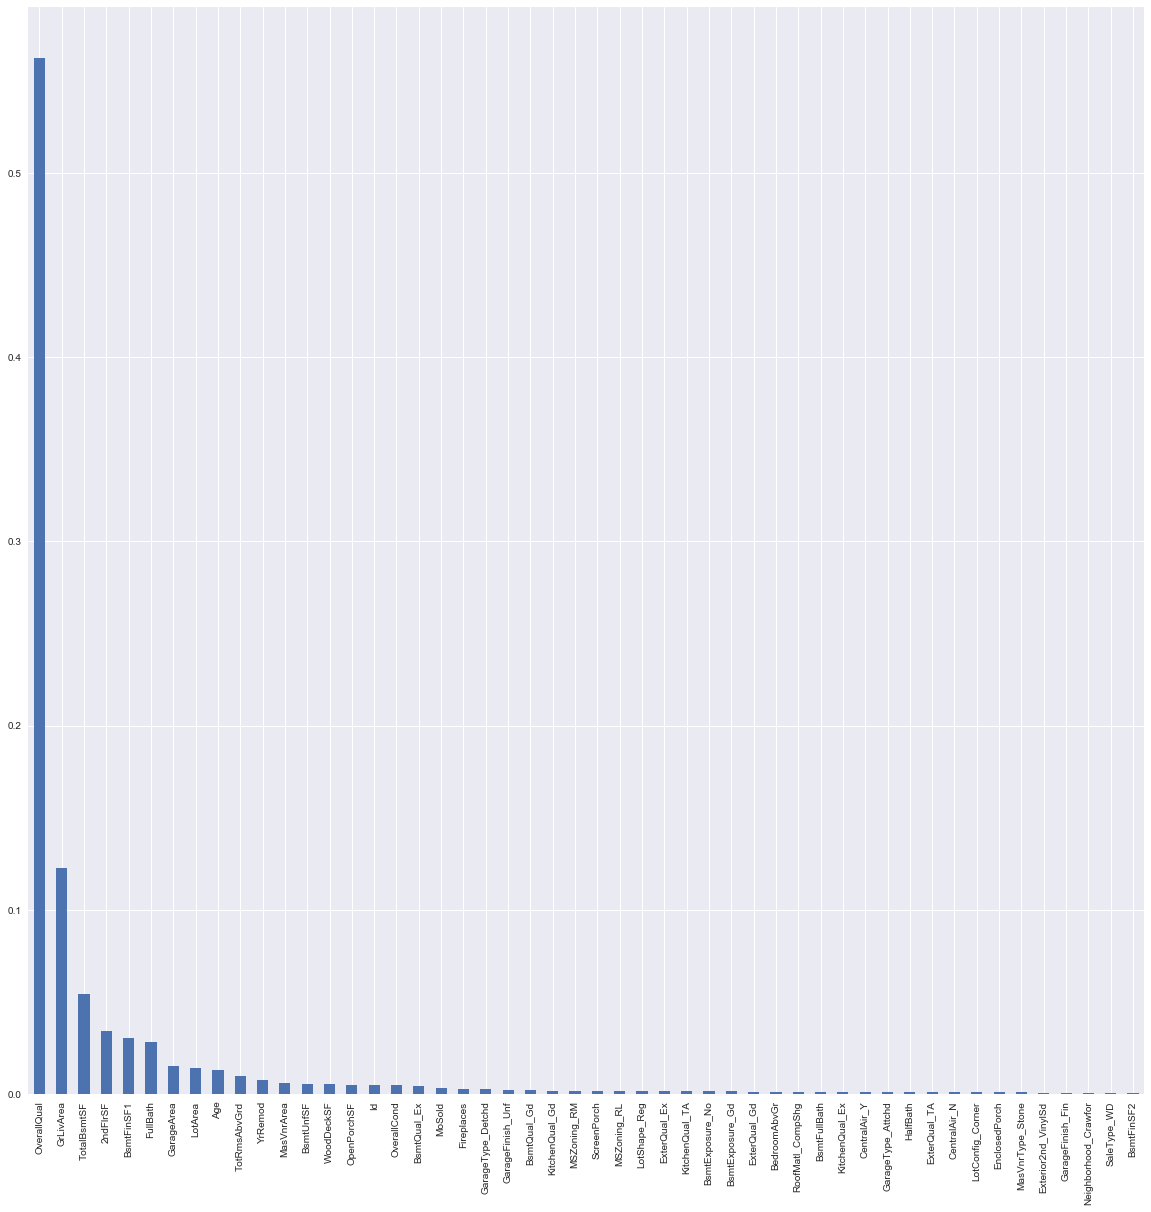

In [71]:
fImportance.head(50).plot(kind="bar", figsize=(20,20))

In [15]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model, X_TrainTree, y_TrainTree, scoring="neg_mean_squared_error",cv=10)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

//anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy: -869581298.896 (+/- 911231588.31)


In [73]:
model.oob_score_ # Produces the R^2 value based on the Out-of-Bag Score

0.85814506635424759

In [16]:
y_oob = model.oob_prediction_

In [104]:
df_TestSet = pd.read_csv('test.csv')
total_t = df_TestSet.isnull().sum().sort_values(ascending=False)
percent_t = (df_TestSet.isnull().sum()/df_TestSet.isnull().count()).sort_values(ascending=False)
missing_data_test = pd.concat([total_t, percent_t], axis=1, keys=['Total of Missing', 'Percent'])
missing_data_test.head(20)

,Total of Missing,Percent
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [105]:
len(df_TestSet.columns)

80

In [106]:
df_cln_test = df_TestSet.drop((missing_data[missing_data['Percent'] > 0.15]).index,1)
df_cln2_test = df_cln_test.dropna(axis=0, how='any')
len(df_cln2_test.columns)

74

In [115]:
col_drop = ["YearBuilt", "YrSold", "YearRemodAdd", "GarageYrBlt"]
#Adding "house age", "years_remodel" (years since last remodel), "age of garage" 
df_cln2_test["Age"] = df_cln2_test["YrSold"] - df_cln2_test["YearBuilt"]
df_cln2_test["YrRemod"] = df_cln2_test["YrSold"] - df_cln2_test["YearRemodAdd"]
df_cln2_test["GarageAge"] = df_cln2_test["YrSold"] - df_cln2_test["GarageYrBlt"]
df_cln3_test = df_cln2_test.drop(df_cln2_test[col_drop],axis=1)
len(df_cln3_test.columns)

/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

73

In [116]:
df_cln3_test['MSSubClass'] = df_cln3_test['MSSubClass'].astype('object')

In [117]:
col_drop2 = ["1stFlrSF","GarageCars","GarageAge"]
dta_testFinal = df_cln3_test.drop(df_cln3_test[col_drop2],axis=1)
len(dta_testFinal.columns)

70

In [118]:
dta_testFinal = dta_testFinal.drop((dta_testFinal.loc[dta_testFinal["YrRemod"] < 0]).index)
len(dta_testFinal.columns)

70

In [119]:
#Some of categorical features are highly skewed("RoofMatl","Condition2"...)
obj_df_test = dta_testFinal.select_dtypes(include=['object']).copy()
int_df_test = dta_testFinal.select_dtypes(exclude=['object']).copy()

obj_dict = {}
for i in obj_df_test.columns:
    obj_dict_test = obj_df_test[i].value_counts()
    print(i)
    print(obj_dict_test)

MSSubClass
20     500
60     266
50     127
120     94
160     59
70      59
80      57
30      55
90      32
85      25
190     21
75       7
180      6
45       6
40       2
150      1
Name: MSSubClass, dtype: int64
MSZoning
RL         1029
RM          205
FV           69
RH            9
C (all)       5
Name: MSZoning, dtype: int64
Street
Pave    1313
Grvl       4
Name: Street, dtype: int64
LotShape
Reg    820
IR1    459
IR2     33
IR3      5
Name: LotShape, dtype: int64
LandContour
Lvl    1183
HLS      67
Bnk      46
Low      21
Name: LandContour, dtype: int64
Utilities
AllPub    1317
Name: Utilities, dtype: int64
LotConfig
Inside     976
Corner     222
CulDSac     77
FR2         33
FR3          9
Name: LotConfig, dtype: int64
LandSlope
Gtl    1256
Mod      58
Sev       3
Name: LandSlope, dtype: int64
Neighborhood
NAmes      207
CollgCr    115
OldTown    103
Somerst     87
NridgHt     87
Gilbert     81
Edwards     70
Sawyer      70
NWAmes      58
Mitchel     58
SawyerW     54
Crawfo

In [120]:
dum_df_test = pd.get_dummies(obj_df_test)
dta_dum_test = pd.concat([dum_df_test,int_df_test], axis=1)
len(dta_dum_test.columns)

256

In [121]:
dta_dum_test.to_csv('/Users/askar/exported_test.csv')

In [122]:
len(pd.DataFrame(X).columns)

13

In [117]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(model, X, y, cv=20)
print("Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: -889098296.683 (+/- 1447474031.47)


In [119]:
model.oob_score_ # Produces the R^2 value based on the Out-of-Bag Score
y_oob = model.oob_prediction_
y_oob

array([ 201886.15384615,  165781.25352113,  219373.82191781, ...,
        250868.05797101,  134108.86075949,  151359.49367089])

In [144]:
TwoHouses_Ftrs = pd.read_csv('TwoHouses.csv', header=0).drop(['SalePrice', 'Unnamed: 0'], axis=1)
TwoHouses_Trgt = pd.read_csv('TwoHouses.csv', header=0)['SalePrice']
TwoHouses_Price = model.predict(TwoHouses_Ftrs)

In [146]:
print("House X's price is : ", TwoHouses_Price[0])
print("House Y's price is : ", TwoHouses_Price[1])

House X's price is :  141093.223
House Y's price is :  118147.116


count      1337.000000
mean     186763.287210
std       78943.356567
min       35311.000000
25%      135000.000000
50%      168500.000000
75%      220000.000000
max      755000.000000
Name: SalePrice, dtype: float64

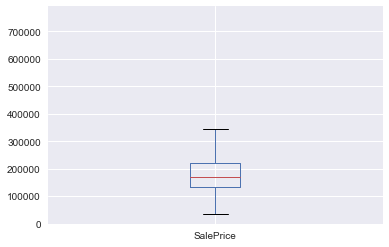

In [67]:
dta_dum.boxplot(column="SalePrice")
dta_dum.SalePrice.describe()

In [18]:
#Low <= 135000, 135000 < Medium < 22000, High >= 220000
%lsmagic
dta_dum_cls = dta_dum
dta_dum_cls['SalePriceClass']=dta_dum['SalePrice']

for index, row in dta_dum_cls.iterrows():
    if dta_dum_cls.SalePriceClass[index] <= 135000:
        dta_dum_cls.SalePriceClass[index] = 1
    elif 220000 > dta_dum_cls.SalePriceClass[index] > 135000:
        dta_dum_cls.SalePriceClass[index] = 2
    else:
        dta_dum_cls.SalePriceClass[index] = 3

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [69]:
dta_dum_cls[["SalePrice", "SalePriceClass"]]

,SalePrice,SalePriceClass
0,208500,2
1,181500,2
2,223500,3
3,140000,2
4,250000,3
5,143000,2
6,307000,3
7,200000,2
8,129900,1
9,118000,1


In [19]:
# Run model without tunning
clf = RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs=-1, random_state=3)

features_clf = dta_dum_cls.columns.drop(['SalePrice', 'SalePriceClass'])
X_clf = np.array(dta_dum_cls[features_clf])
target = dta_dum_cls.SalePriceClass
y_clf = np.array(target)

clf.fit(X_clf, y_clf)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=-1, oob_score=True, random_state=3,
            verbose=0, warm_start=False)

In [71]:
fImportance_clf = pd.Series(clf.feature_importances_, index=features_clf)
fImportance_clf.sort(ascending=False)
fImportance_clf

/Users/askar/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


GrLivArea                0.077464
OverallQual              0.055821
TotalBsmtSF              0.052290
GarageArea               0.051944
LotArea                  0.038754
Age                      0.035323
YrRemod                  0.028034
TotRmsAbvGrd             0.025826
BsmtFinSF1               0.025352
2ndFlrSF                 0.024807
BsmtUnfSF                0.019936
ExterQual_TA             0.018804
Fireplaces               0.018163
OpenPorchSF              0.018163
MasVnrArea               0.017109
FullBath                 0.015995
Id                       0.015220
KitchenQual_TA           0.014183
GarageFinish_Unf         0.013883
WoodDeckSF               0.012892
MoSold                   0.012544
GarageType_Detchd        0.012283
ExterQual_Gd             0.010877
BsmtQual_TA              0.009931
Foundation_PConc         0.009440
OverallCond              0.009252
BedroomAbvGr             0.008998
BsmtQual_Gd              0.008749
GarageType_Attchd        0.008260
MSZoning_RM   

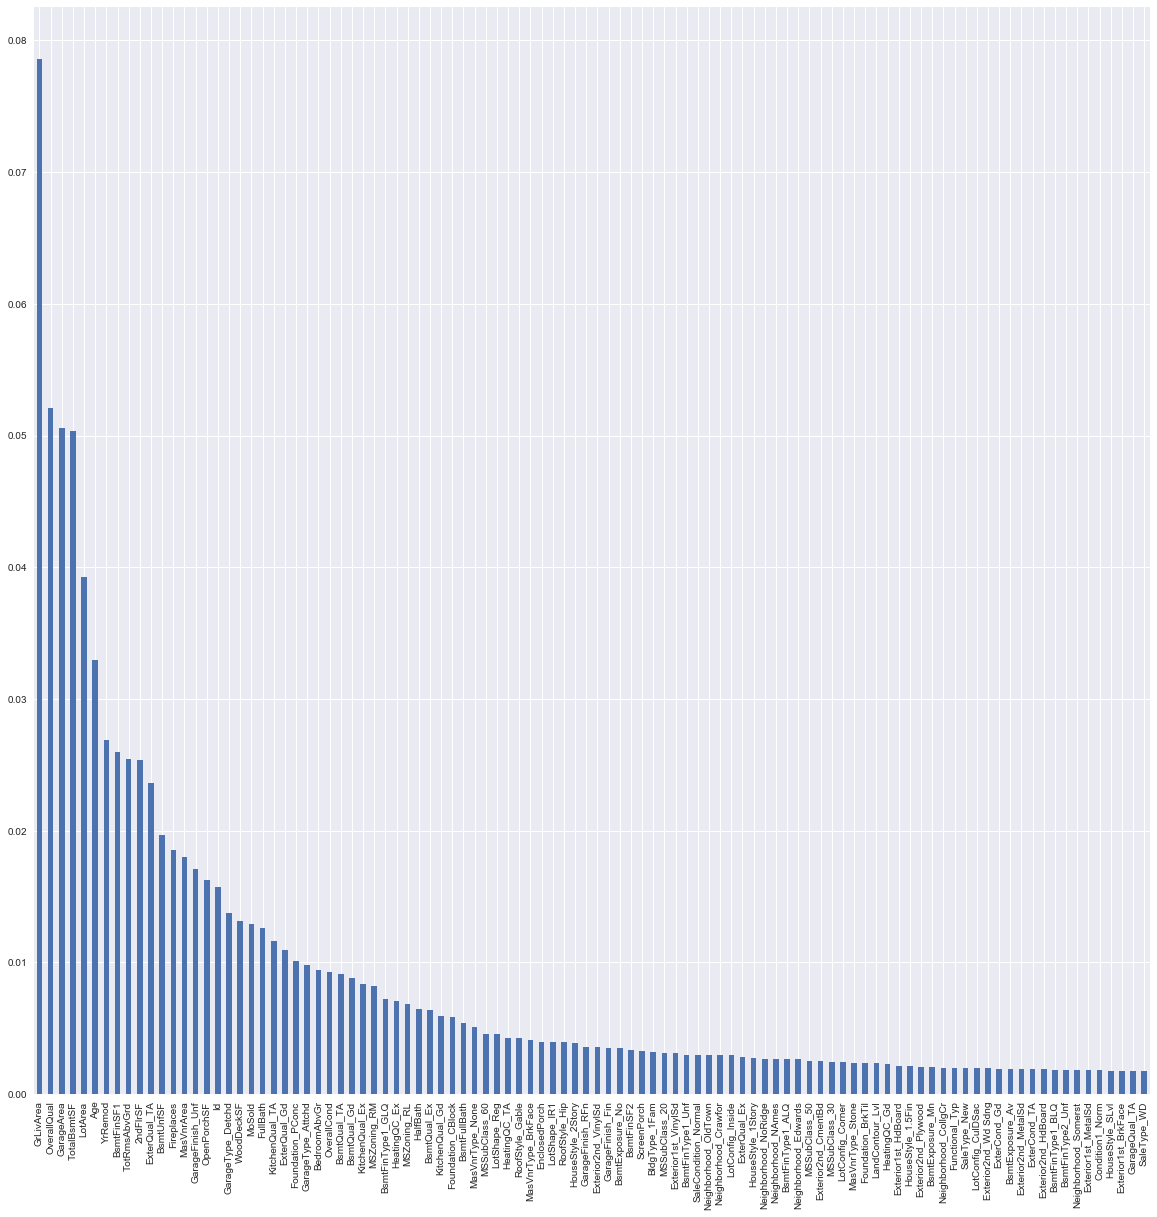

In [125]:
fImportance_clf.head(100).plot(kind="bar", figsize=(20,20))

In [78]:
scores_clf_R2 = cross_val_score(clf, X_clf, y_clf, cv=20)
scores_clf = cross_val_score(clf, X_clf, y_clf, cv=20, scoring="neg_mean_squared_error")
print("Cross Validation R2 is: %0.3f and MSE is: %0.3f"%(scores_clf_R2.mean(), -scores_clf.mean()))

Cross Validation R2 is: 0.840 and MSE is: 0.160
